**CS422 DATA MINING PROJECT** \
**Yash Pradeep Gupte** \
**CWID : A20472798** \



**[1] Abstract :**  This project evalutes models and how well these models generalise the out of sample dataset. I have presented different data mining techniques to evalute the importance of features, performace of model based on accuracy. I learned how a multi class classification problem can be broken down into simpler tasks like Binary classification. Features play an important role in deciding the model performs. In some cases, dropping or adding features can make substantial difference in the model accuracy. I also learned that class imblance play another major role in decidin how well a model performs.  


In [2]:
!pip install skl2onnx
!pip install onnxruntime

     |████████████████████████████████| 235kB 11.5MB/s 
     |████████████████████████████████| 81kB 4.6MB/s 
     |████████████████████████████████| 12.2MB 25.3MB/s 
     |████████████████████████████████| 4.1MB 10.5MB/s 


In [3]:
#Mount Drive 
import os

# Mount drive if not mounted already & change current working directory to MyDrive
if not os.path.exists('/content/drive/'):
  from google.colab import drive
  drive.mount('/content/drive/')

if os.path.exists('/content/drive'):
  os.chdir('drive/My Drive')
  print('Current working directory:', os.getcwd())

Mounted at /content/drive/
Current working directory: /content/drive/My Drive


In [4]:
ls

'Colab Notebooks'/          CS577_DL_AS2_Report2.gdoc
 CS422_DataMining/          CS577_DL_AS3_Report2.gdoc
 CS422_DM_HW1.gdoc          CS577_DL_AS4_Report2.gdoc
 CS422_DM_HW2.gdoc         'CS577_Project document.gdoc'
 CS422_DM_HW4.gdoc         'CS577_Yash&Namita_Project_Proposal.gdoc'
 CS553_CC_HW1.gdoc          hw1-report.gdoc
 CS553_CC_HW2.gdoc          YashPradeepGupte_CS553_CC_HW3.gdoc
 CS553_CC_hw4_report.gdoc   YashPradeepGupte_CS577_AS1_Report.gdoc
 CS553_CC_hw5_report.gdoc   YashPradeepGupte_Resume.pdf
 CS577_DeepLearning/        YG_CS422_DM_HW3.gdoc


In [5]:
cd CS422_DataMining/

/content/drive/My Drive/CS422_DataMining


In [6]:
ls

75000-out2-binary.csv  data_public.csv.gz


In [8]:
import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn import metrics

from sklearn.decomposition import PCA

from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

import onnxruntime as rt

from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

import graphviz



**[2] Overview:** \

Problem Statement : The objective of this project is to analyze the given dataset, perform various data mining techniques and produce insights on how a selected model generalises the data. 




Proposed Methodology :  In this project I am creating Pipelines which consists of different functions like Standard scalar, PCA and Classification. This pipeline consist of a model which is trained on the dataset. I have implemented Binary classification as well as Non linear combination of features. All the models are tested / evaluted on basis of accuracy metrics.

**[3] Data Processing and Data Analysis**

In [9]:
data_df = pd.read_csv("data_public.csv.gz", compression='gzip',header=0,sep=',', quotechar='"')
data_df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


[3.1] Summary statistics : First I am checking for missing values or null values in the dataset.

In [10]:
data_df.isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

From the above results we can see that there are no NULL values in the dataset. Hence we could now proceed with performing standard scaling of the dataset.

In [11]:
data_df.corr()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
A,1.000000,0.455949,0.991999,0.071330,0.990703,0.905353,0.972223,0.988807,0.818399,0.870016,0.968827,0.139619,0.958931,0.953081,0.920322,-0.000620
B,0.455949,1.000000,0.541742,0.865856,0.352946,0.760708,0.620607,0.339549,-0.098558,0.803246,0.246429,0.854635,0.345030,0.194578,0.098805,0.000138
C,0.991999,0.541742,1.000000,0.176224,0.971805,0.943482,0.988351,0.968342,0.753474,0.915784,0.937868,0.238723,0.941040,0.916578,0.873800,-0.000686
D,0.071330,0.865856,0.176224,1.000000,-0.047459,0.477183,0.279248,-0.062451,-0.502643,0.544357,-0.163679,0.949485,-0.042057,-0.217856,-0.316241,0.000150
E,0.990703,0.352946,0.971805,-0.047459,1.000000,0.849129,0.939705,0.997116,0.879142,0.805749,0.989217,0.026319,0.964769,0.979925,0.958885,-0.000649
F,0.905353,0.760708,0.943482,0.477183,0.849129,1.000000,0.969055,0.841227,0.508345,0.989868,0.781534,0.518117,0.823551,0.745156,0.675416,-0.000540
G,0.972223,0.620607,0.988351,0.279248,0.939705,0.969055,1.000000,0.934714,0.678043,0.949429,0.894114,0.335039,0.910385,0.867546,0.815281,-0.000472
H,0.988807,0.339549,0.968342,-0.062451,0.997116,0.841227,0.934714,1.000000,0.886017,0.796856,0.990875,0.012005,0.964627,0.982403,0.962873,-0.000670
I,0.818399,-0.098558,0.753474,-0.502643,0.879142,0.508345,0.678043,0.886017,1.000000,0.439881,0.926217,-0.418110,0.848801,0.943365,0.970965,-0.000766
J,0.870016,0.803246,0.915784,0.544357,0.805749,0.989868,0.949429,0.796856,0.439881,1.000000,0.730841,0.579309,0.781815,0.691273,0.615931,-0.000333


The correlation results shows us that there is very less correlation between the features and class labels. The feature to feature correlation can be idefntified can we can select one of the two liearly dependent features and thus decrease the dimension. I have perfomed selection of features ahead in this document.

[3.2] Data Visualization : Now lets check the distribution of data for any imbalances.

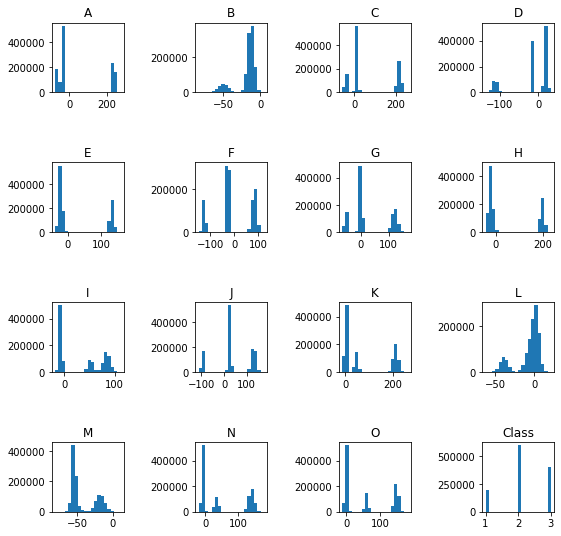

In [12]:
#Visualization
features = 'ABCDEFGHIJKLMNO'

fig1 = plt.figure() 
for i in range(1,16):
    fig1.add_subplot(4,4,i)
    plt.hist(data_df[features[i-1:i]], bins=20)
    plt.title(features[i-1:i])
    
fig1.add_subplot(4,4,16)
plt.hist(data_df['Class'], bins=20)
plt.title('Class')
fig1.subplots_adjust(hspace=1, wspace=1)
fig1.set_figheight(9)
fig1.set_figwidth(9)

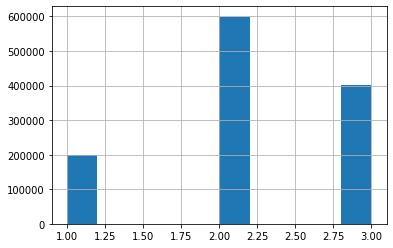

In [13]:
#Visualizing the class label distribution

data_df['Class'].hist()

[3.3] Data issues : We can see that particularly for class labels the Class 2 has lot more examples than other two classes. Also, class 1 has the least amount of examples.

Now lets split thet dataset into test and train and then standardize it.

In [14]:
X_og = pd.DataFrame(data=data_df.drop('Class', axis=1))
X_og.head()
y_og = pd.DataFrame(data=data_df['Class'])
y_og.head()

,Class
0,2
1,3
2,2
3,2
4,3


In [15]:
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(X_og, y_og, test_size=0.20, random_state=97)

In [16]:
training_data_og = pd.concat([x_train_og,y_train_og],axis=1)
training_data_og.head()
print(len(training_data_og))

training_labels_og = list(X_og.columns)
print(training_labels_og)

960000
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


In [17]:
#Standard scalar
standard_scalar = StandardScaler()
training_df_scaled_og = standard_scalar.fit_transform(training_data_og.drop('Class', axis=1))
training_df_scaled_og = pd.DataFrame(training_df_scaled_og, columns=training_labels_og)
print(len(training_df_scaled_og))
print(training_df_scaled_og.head(10))
print(training_df_scaled_og.isnull().values.any())

training_df_scaled_og = pd.merge(training_data_og['Class'],training_df_scaled_og, left_index=True, right_index=True, how='inner')
print(len(training_df_scaled_og))
print(training_df_scaled_og.head(10))
print(training_df_scaled_og.isnull().values.any())



960000
          A         B         C  ...         M         N         O
0  1.440950  0.765287  1.458101  ...  0.788554  1.398047  1.413347
1  1.317774  0.528108  1.321870  ...  1.066979  1.476711  1.263338
2 -0.663411  0.429147 -0.662361  ... -0.687958 -0.850573 -0.859964
3 -0.641023 -0.040729 -0.550038  ... -0.503728 -0.851243 -0.858986
4 -0.630074 -0.094215 -0.551774  ... -0.471425 -0.824783 -0.929646
5  1.458450  0.256821  1.356139  ...  1.518827  1.220957  1.347866
6 -0.846250 -1.936970 -1.091371  ... -0.052989 -0.284619  0.110404
7  1.383809  0.958845  1.446394  ...  1.417070  1.392328  1.423425
8 -0.855554 -2.160599 -1.045623  ... -0.315759 -0.284472  0.083560
9 -0.838952 -1.825808 -1.071149  ... -0.322718 -0.461967 -0.041303

[10 rows x 15 columns]
False
768010
        Class         A         B  ...         M         N         O
739135      3 -0.658611  0.228425  ... -0.734685 -0.857980 -0.941281
54118       3  1.356763  0.236029  ...  1.623599  1.415648  1.330797
293468      

Principal Component Analysis : Now , we have to extarct the optimal number of principal components to use for all the pipelines. I executed PCA with all the components and observed the explained variance by all the features. I realised that n_component = 1 is a better select.

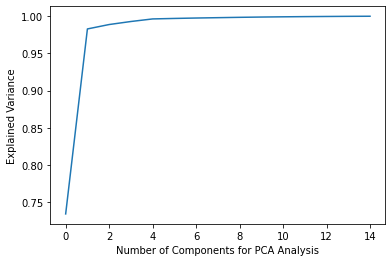

[7.33972266e-01 2.48933297e-01 5.94149152e-03 4.07366435e-03
 3.46361345e-03 6.57919941e-04 5.61878608e-04 4.72793000e-04
 4.62247400e-04 3.82487210e-04 3.10561061e-04 2.56399887e-04
 2.01480639e-04 1.84763545e-04 1.25136075e-04]
1.0


In [18]:
#PCA
pca_n_comp = PCA(n_components=15)
pca_n_comp.fit(training_df_scaled_og.drop('Class', axis=1))
plt.plot(np.cumsum(pca_n_comp.explained_variance_ratio_))
plt.xlabel('Number of Components for PCA Analysis')
plt.ylabel('Explained Variance')
plt.show()
print(pca_n_comp.explained_variance_ratio_)
print(sum(pca_n_comp.explained_variance_ratio_))

In this part I constructed a Pipeline with Decision Tree Classifier  by dropping each feature one at a time.

In [19]:
#FEATURE REMOVAL 

list_of_features = 'ABCDEFGHIJKLMNO'

for i in range(len(features)):
  trans = Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1))])

  col_tarns = ColumnTransformer(transformers=[('keep_all_cols', trans , x_train_og.columns.drop([list_of_features[i:i+1]]).values)])

  pipeline_og = Pipeline(steps=[('col_trans',col_tarns),('classifier',DecisionTreeClassifier(max_depth = 3,criterion='gini'))])

  model_og= pipeline_og.fit(x_train_og, y_train_og)

  results = pipeline_og.predict(x_test_og)

  actual = np.concatenate(y_test_og.values)

  
  print("Dropping feature :", list_of_features[i:i+1],", Accuracy obtained:", metrics.accuracy_score(actual, results))

  




Dropping feature : A , Accuracy obtained: 0.49764166666666665
Dropping feature : B , Accuracy obtained: 0.4976375
Dropping feature : C , Accuracy obtained: 0.4976333333333333
Dropping feature : D , Accuracy obtained: 0.49764583333333334
Dropping feature : E , Accuracy obtained: 0.49762083333333335
Dropping feature : F , Accuracy obtained: 0.49764583333333334
Dropping feature : G , Accuracy obtained: 0.49764166666666665
Dropping feature : H , Accuracy obtained: 0.4975875
Dropping feature : I , Accuracy obtained: 0.4975791666666667
Dropping feature : J , Accuracy obtained: 0.49764583333333334
Dropping feature : K , Accuracy obtained: 0.49764166666666665
Dropping feature : L , Accuracy obtained: 0.4976375
Dropping feature : M , Accuracy obtained: 0.4975833333333333
Dropping feature : N , Accuracy obtained: 0.49764166666666665
Dropping feature : O , Accuracy obtained: 0.49765


From the abve results, we can infer that by dropping one feature at a time there is no difference in accuracy. Maybe accuracy might not be the right metric to judge feature quality.


[3.5] Pipeline details : Perfom Standard scalar and then PCA with 1 components 


[3.6] Assumption / Adjustments : Another way to look at this problem can be converting a ternary (three class) classification problem into a Binary Classification Problem. For instance looking a class 1 verses NOT class 1. For that we could combine / label class 2 and class 3 as - class 0.This class 0 basically is examples which do not belong to class 1. I have performed this technique each on class 1 2 and 3. The process of trimming down original dataframes into binary classification is executed as below. 


[3.6.1] Create a Dataframe with values 1 and NOT 1 that is class 2 & 3 and replace these values with 0





In [20]:
data_df_1 = data_df.copy(deep=True)

In [21]:
data_df_1.loc[(data_df_1['Class'] == 2)|(data_df_1['Class'] == 3) , 'Class'] = 0

In [22]:
data_df_1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,0
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,0
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,0
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,0
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,0


In [23]:
data_df_1['Class'].unique()

array([0, 1])

In [25]:
X_1 = pd.DataFrame(data=data_df_1.drop('Class', axis=1))
X_1.head()
training_labels_1 = list(X_1.columns)
print(training_labels_1)
y_1 = pd.DataFrame(data=data_df_1['Class'])
y_1.head()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


,Class
0,0
1,0
2,0
3,0
4,0


In [26]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20, random_state=97)

In [27]:
training_data_1 = pd.concat([x_train_1,y_train_1],axis=1)
training_data_1.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
739135,236.953747,-7.759034,225.159958,-11.995705,136.637974,87.661684,125.075666,200.787092,76.521628,144.867903,213.326676,-2.315755,-28.195627,143.575697,154.203753,0
1081420,221.033289,-11.187842,210.817531,-15.993283,130.047755,90.522895,108.015150,193.448474,94.147234,130.212659,223.077630,3.780402,-23.207949,148.869317,144.184592,0
974288,-35.035454,-12.618482,1.916518,13.597099,-26.472790,-20.551867,-1.923341,-25.359377,-5.907361,27.024969,6.250704,-1.762495,-54.645811,-7.743355,2.368558,0
1005424,-32.141839,-19.411296,13.741958,18.517671,-18.977989,-31.162255,0.696911,-22.133239,-9.090903,24.933827,-0.076681,-0.287504,-51.345522,-7.788391,2.433881,0
54118,-30.726699,-20.184529,13.559096,19.658662,-27.099861,-21.148438,1.095623,-20.215625,-8.436967,29.737919,3.935207,1.128940,-50.766839,-6.007826,-2.285504,0


Now i have dropped class 1 and  labeled classes 2 and 3 as 0 because we have test this new dataset  on a model which is trained on class 1 verses NOT class1. This same method I have performed for class 2 and class 3.

In [28]:
data_df_only_23 = data_df.copy(deep=True)

In [29]:
data_df_only_23.drop(data_df_only_23[data_df_only_23['Class'] ==1].index, inplace = True)
data_df_only_23.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [30]:
#replace label classes 2 and 3 as 0 because thats NOT class 1

data_df_only_23.loc[(data_df_only_23['Class'] == 3) | (data_df_only_23['Class'] == 2) , 'Class'] = 0 
data_df_only_23.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,0
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,0
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,0
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,0
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,0


In [31]:
data_df_only_23['Class'].unique()

array([0])

In [32]:
X_23 = pd.DataFrame(data=data_df_only_23.drop('Class', axis=1))
X_23.head()
training_labels_only_23 = list(X_23.columns)
print(training_labels_only_23)
y_23 = pd.DataFrame(data=data_df_only_23['Class'])
y_23.head()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


,Class
0,0
1,0
2,0
3,0
4,0


In [33]:
x_train_23, x_test_23, y_train_23, y_test_23 = train_test_split(X_23, y_23, test_size=0.20, random_state=97)

[3.6.2] Create a Dataframe with values 2 and NOT 2 that is class 1 & 3 and replace these values with 0

In [34]:
data_df_2 = data_df.copy(deep=True)
data_df_2.loc[(data_df_2['Class'] == 1)|(data_df_2['Class'] == 3) , 'Class'] = 0
data_df_2['Class'].unique()


array([2, 0])

In [35]:
X_2 = pd.DataFrame(data=data_df_2.drop('Class', axis=1))
X_2.head()
training_labels_2 = list(X_2.columns)
print(training_labels_2)
y_2 = pd.DataFrame(data=data_df_2['Class'])
y_2.head()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


,Class
0,2
1,0
2,2
3,2
4,0


In [36]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=97)

In [37]:
training_data_2 = pd.concat([x_train_2,y_train_2],axis=1)
training_data_2.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
739135,236.953747,-7.759034,225.159958,-11.995705,136.637974,87.661684,125.075666,200.787092,76.521628,144.867903,213.326676,-2.315755,-28.195627,143.575697,154.203753,0
1081420,221.033289,-11.187842,210.817531,-15.993283,130.047755,90.522895,108.015150,193.448474,94.147234,130.212659,223.077630,3.780402,-23.207949,148.869317,144.184592,2
974288,-35.035454,-12.618482,1.916518,13.597099,-26.472790,-20.551867,-1.923341,-25.359377,-5.907361,27.024969,6.250704,-1.762495,-54.645811,-7.743355,2.368558,2
1005424,-32.141839,-19.411296,13.741958,18.517671,-18.977989,-31.162255,0.696911,-22.133239,-9.090903,24.933827,-0.076681,-0.287504,-51.345522,-7.788391,2.433881,2
54118,-30.726699,-20.184529,13.559096,19.658662,-27.099861,-21.148438,1.095623,-20.215625,-8.436967,29.737919,3.935207,1.128940,-50.766839,-6.007826,-2.285504,0


Drop class 2 and now label classes 1 and 3 as 0.

In [38]:
data_df_only_13 = data_df.copy(deep=True)
data_df_only_13.drop(data_df_only_13[data_df_only_13['Class'] ==2].index, inplace = True)
data_df_only_13.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3
7,-28.620633,-16.324678,6.614499,19.866385,-23.119998,-22.328572,1.477065,-26.383605,-8.616671,28.874319,1.743714,4.953251,-55.702022,-8.014284,2.449081,3
8,-41.092898,-11.525839,12.027010,18.670988,-19.612979,-25.918632,5.266337,-25.972718,-13.371210,25.709532,-1.515002,-1.041023,-54.683633,-12.382565,5.424004,3
11,-23.413125,-11.119531,16.910592,18.915184,-25.170026,-28.504337,-2.371616,-26.557941,-4.756554,20.160979,3.415932,8.147177,-52.641582,-6.348362,0.196517,1


In [39]:
#replace label classes 1 and 2 as 0 because thats NOT class 1

data_df_only_13.loc[(data_df_only_13['Class'] == 1) | (data_df_only_13['Class'] == 3) , 'Class'] = 0 
data_df_only_13.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,0
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,0
7,-28.620633,-16.324678,6.614499,19.866385,-23.119998,-22.328572,1.477065,-26.383605,-8.616671,28.874319,1.743714,4.953251,-55.702022,-8.014284,2.449081,0
8,-41.092898,-11.525839,12.027010,18.670988,-19.612979,-25.918632,5.266337,-25.972718,-13.371210,25.709532,-1.515002,-1.041023,-54.683633,-12.382565,5.424004,0
11,-23.413125,-11.119531,16.910592,18.915184,-25.170026,-28.504337,-2.371616,-26.557941,-4.756554,20.160979,3.415932,8.147177,-52.641582,-6.348362,0.196517,0


In [40]:
X_13 = pd.DataFrame(data=data_df_only_13.drop('Class', axis=1))
X_13.head()
training_labels_only_13 = list(X_13.columns)
print(training_labels_only_13)
y_13 = pd.DataFrame(data=data_df_only_13['Class'])
y_13.head()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


,Class
1,0
4,0
7,0
8,0
11,0


In [41]:
x_train_13, x_test_13, y_train_13, y_test_13 = train_test_split(X_13, y_13, test_size=0.20, random_state=97)

[3.6.3] Create a Dataframe with values 3 and NOT 3 that is class 1 & 2 and replace these values with 0

In [42]:
data_df_3 = data_df.copy(deep=True)
data_df_3.loc[(data_df_3['Class'] == 1)|(data_df_3['Class'] == 2) , 'Class'] = 0
data_df_3['Class'].unique()


array([0, 3])

In [43]:
X_3 = pd.DataFrame(data=data_df_3.drop('Class', axis=1))
X_3.head()
training_labels_3 = list(X_3.columns)
print(training_labels_3)
y_3 = pd.DataFrame(data=data_df_3['Class'])
y_3.head()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


,Class
0,0
1,3
2,0
3,0
4,3


In [44]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20, random_state=97)

In [45]:
training_data_3 = pd.concat([x_train_3,y_train_3],axis=1)
training_data_3.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
739135,236.953747,-7.759034,225.159958,-11.995705,136.637974,87.661684,125.075666,200.787092,76.521628,144.867903,213.326676,-2.315755,-28.195627,143.575697,154.203753,3
1081420,221.033289,-11.187842,210.817531,-15.993283,130.047755,90.522895,108.015150,193.448474,94.147234,130.212659,223.077630,3.780402,-23.207949,148.869317,144.184592,0
974288,-35.035454,-12.618482,1.916518,13.597099,-26.472790,-20.551867,-1.923341,-25.359377,-5.907361,27.024969,6.250704,-1.762495,-54.645811,-7.743355,2.368558,0
1005424,-32.141839,-19.411296,13.741958,18.517671,-18.977989,-31.162255,0.696911,-22.133239,-9.090903,24.933827,-0.076681,-0.287504,-51.345522,-7.788391,2.433881,0
54118,-30.726699,-20.184529,13.559096,19.658662,-27.099861,-21.148438,1.095623,-20.215625,-8.436967,29.737919,3.935207,1.128940,-50.766839,-6.007826,-2.285504,3


Drop class 3 and now label classes 1 and 2 as 0 ie NOT class 3(1 & 2)

In [46]:
data_df_only_12 = data_df.copy(deep=True)
data_df_only_12.drop(data_df_only_12[data_df_only_12['Class'] ==3].index, inplace = True)
data_df_only_12.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
5,235.027198,-16.081132,213.391582,-12.934912,122.413766,80.222540,125.240412,185.694965,66.072251,142.555417,213.442083,0.728989,-26.046291,137.529415,143.348783,2
6,-35.819795,-16.688245,5.738227,17.570011,-31.523595,-20.625764,0.077354,-28.944922,-10.699215,26.982097,2.958726,-2.365574,-56.082634,-6.918042,-0.996789,2


In [47]:
#replace label classes 1 and 2 as 0 because thats NOT class 1

data_df_only_12.loc[(data_df_only_12['Class'] == 1) | (data_df_only_12['Class'] == 2) , 'Class'] = 0 
data_df_only_12.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,0
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,0
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,0
5,235.027198,-16.081132,213.391582,-12.934912,122.413766,80.222540,125.240412,185.694965,66.072251,142.555417,213.442083,0.728989,-26.046291,137.529415,143.348783,0
6,-35.819795,-16.688245,5.738227,17.570011,-31.523595,-20.625764,0.077354,-28.944922,-10.699215,26.982097,2.958726,-2.365574,-56.082634,-6.918042,-0.996789,0


In [48]:
X_12 = pd.DataFrame(data=data_df_only_12.drop('Class', axis=1))
X_12.head()
training_labels_only_23 = list(X_12.columns)
print(training_labels_only_23)
y_12 = pd.DataFrame(data=data_df_only_12['Class'])
y_12.head()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


,Class
0,0
2,0
3,0
5,0
6,0


In [49]:
x_train_12, x_test_12, y_train_12, y_test_12 = train_test_split(X_12, y_12, test_size=0.20, random_state=97)

I have trained the above dataframes on different Decision tree classifier models , this part comes under **[4] Model training** part of this document.

Also, I have created a dataframe with class lables 2 and 3 and trained the model to test how accurate the model performs for class 2 vs class 3.

In [50]:
data_df_2v3 = data_df.copy(deep=True) 

In [51]:
data_df_2v3 = data_df_2v3[data_df_2v3.Class.isin([2,3])]
data_df_2v3.head()
data_df_2v3['Class'].unique()

array([2, 3])

In [52]:
X_2v3 = pd.DataFrame(data=data_df_2v3.drop('Class', axis=1))
X_2v3.head()
training_labels_2v3 = list(X_2v3.columns)
print(training_labels_2v3)
y_2v3 = pd.DataFrame(data=data_df_2v3['Class'])
y_2v3.head()

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


,Class
0,2
1,3
2,2
3,2
4,3


In [53]:
x_train_2v3, x_test_2v3, y_train_2v3, y_test_2v3 = train_test_split(X_2v3, y_2v3, test_size=0.20, random_state=97)

**[4] Model Training and Model Validation:** 






The training performance (Performance Criteria) , Testing results and Biases/risk have been discussed in the following section.

[4.1] Model Selection : Here I have trained mutiple models on mutiple binary classification datasets. 

Descision tree for class 1 and not 1 : Now lets train a Decision tree classifier with max_dept=3. For this model we are passing the 1 verses NOT 1 dataframe.

In [54]:
#Descision tree for class 1 and not 1
pipeline_dc_1= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
dc_model_1= pipeline_dc_1.fit(x_train_1, y_train_1)


print(dc_model_1.score(x_test_1,y_test_1))

0.8327041666666667


The above results shows that the model is accurate( 83.27 %) in classifying class 1 and not class 1. This gives us an insight that we can thus use this model to classify classes 2 and 3 which are basically NOT class 1.


Now run the same above model on classes with Only 'NOT 1' that is class 0(clsses 2 &3)

In [55]:
print(dc_model_1.score(x_test_23,y_test_23))

1.0


The above accuracy result shows us that a model which is 83% accurate at classifying class 1 vs not class 1 . It is 100% accurate at classifying just NOT Class 1 that is class 2 and 3. 

In [56]:
print(classification_report(pipeline_dc_1.predict(x_test_1),y_test_1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91    240000
           1       0.00      0.00      0.00         0

    accuracy                           0.83    240000
   macro avg       0.50      0.42      0.45    240000
weighted avg       1.00      0.83      0.91    240000



In [57]:
print(metrics.confusion_matrix(pipeline_dc_1.predict(x_test_1),y_test_1))

[[199849  40151]
 [     0      0]]


Model training for class 2 and not class 2

In [64]:
pipeline_dc_2= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
dc_model_2= pipeline_dc_2.fit(x_train_2, y_train_2)


print(dc_model_2.score(x_test_2,y_test_2))

0.5019291666666666


Above model is 50.23 % accurate at classifying class 2 versus not class 2 ( that is class 1 and 2)

Now run the same above model on classes with Only 'NOT 2' that is class 0(clsses 1 &3)

In [59]:
#Now run the same above model on classes with only NOT 2 that is class 0(1 &3)
print(dc_model_2.score(x_test_13,y_test_13))

0.8957762889600932


This model is 89.57% accurate at classifying the NOT class 2 classes( that is class 1 and 3 )

Model training for class 3 and not 3

In [65]:
pipeline_dc_3= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
dc_model_3= pipeline_dc_3.fit(x_train_3, y_train_3)


print(dc_model_3.score(x_test_3,y_test_3))

0.6649333333333334


The above model has 66.49% accuracy to identify class 3 and not class 3 (classes 1 and 2).

In [66]:
#Now run the same above model on classes with only NOT 3 that is class 0(1 &2)
print(dc_model_3.score(x_test_12,y_test_12))

1.0


The previous model when tested for Not class 3 (class 1 and 2) it produces 100% accuracy. 

From the above three models , I observed that these models are very accurate at predicting the NOT class (1 , 2 or 3). But they are poor at classifying the real class. This might a resourceful information which can be used to construct our final model. 

Now, I have build a model for binary classification of class 2 vs class 3. 

In [67]:
#Decision tree for classes 2 vs class 3
pipeline_dc_2v3= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
dc_model_2v3= pipeline_dc_2v3.fit(x_train_2v3, y_train_2v3)


print(dc_model_2v3.score(x_test_2v3,y_test_2v3))

0.5996190038099619


The above model has got 59.96% accuracy at classifying class 2 and class 3.

[4.2] Feature Engineering : To drill down the features I have implemented sklearn feature selection technique of SelectKBest features. 

Before passing the dataset into the feature selector I have performed normalization of values using MinMaxScaler 

In [68]:
#Min max scalar - normalization
minmax_scalar = MinMaxScaler()
training_minmx_scaled_og = minmax_scalar.fit_transform(x_train_og)

x_train_minmax_scaled_og = training_minmx_scaled_og

In [69]:
print(training_minmx_scaled_og[0])

[0.90692157 0.8606452  0.9017326  0.73778793 0.89124714 0.87763257
 0.83321182 0.88321973 0.73142778 0.89347264 0.82980411 0.71561456
 0.58024969 0.8274207  0.88963752]


Now, let's perform SelectKBest on the entire dataframe. 

In [70]:
# Select K best features from data_df

x_train_og_new = SelectKBest(score_func=chi2, k=5).fit_transform(x_train_minmax_scaled_og,y_train_og)

print(x_train_og_new[0])



[0.90692157 0.9017326  0.89124714 0.88321973 0.82980411]


Mapping above values with dataset we get features A , C , E , H , K as the most optimal ones.

In [85]:
x_final_kb =  data_df[['A','C','E','H','K']]

y_final_kb = data_df['Class']
x_train_kb , x_test_kb, y_train_kb , y_test_kb = train_test_split(x_final_kb, y_final_kb, stratify = y_final_kb , test_size= 0.2)



In [86]:
training_data_kb = pd.concat([x_final_kb,y_final_kb], axis=1)

In [87]:
training_data_kb.corr()

,A,C,E,H,K,Class
A,1.000000,0.991999,0.990703,0.988807,0.968827,-0.000620
C,0.991999,1.000000,0.971805,0.968342,0.937868,-0.000686
E,0.990703,0.971805,1.000000,0.997116,0.989217,-0.000649
H,0.988807,0.968342,0.997116,1.000000,0.990875,-0.000670
K,0.968827,0.937868,0.989217,0.990875,1.000000,-0.000693
Class,-0.000620,-0.000686,-0.000649,-0.000670,-0.000693,1.000000


Looking at the correlation between selected features, we can observe that feature A and C , feature E and H are higly correlated to each other. But all these features are negatively correlated to the class labels.

In [88]:
#Decision tree for entire df with k best features 
pipeline_dc_kb= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
dc_model_kb= pipeline_dc_kb.fit(x_train_kb, y_train_kb)


print(dc_model_kb.score(x_test_kb,y_test_kb))

0.49935


Training a Decision tree classifer on 5 Best features we get 49.93% accuracy 

As a part of Feature Engineering I tried a  Non linear Combination of the selected 5 best features. 

In [76]:
#Non linear combination of K best features of the entire dataset [A , C ,E ,H ,K]
p , q, r , s = [],[],[],[]
for index, row in training_data_kb.iterrows(): 
  p.append(row.A * row.C)
  q.append(row.E * row.K)
  r.append(row.C * row.K)
  s.append(row.A * row.K)




Concatenating new features P, Q ,R & S to our previous data frame.

In [90]:
training_data_kb['P'] = p
training_data_kb['Q'] = q
training_data_kb['R'] = r
training_data_kb['S'] = s


In [91]:
training_data_kb.head()

,A,C,E,H,K,Class,P,Q,R,S
0,231.420023,217.624839,140.047185,198.160805,224.592926,2,50362.745196,31453.607184,48876.999387,51975.300090
1,-38.019270,9.583547,-25.578283,-33.711852,4.199023,3,-364.359441,-107.403799,40.241533,-159.643791
2,-39.197085,21.023083,-25.902587,-25.299219,5.911292,2,-824.043581,-153.117747,124.273575,-231.705404
3,221.630408,216.725322,126.795177,197.640135,212.989231,2,48032.921455,27006.007214,46160.159759,47204.890157
4,228.558412,204.637218,138.930529,209.300011,201.795100,3,46771.557449,28035.499918,41294.787734,46121.967528


In [92]:
x_nl_kb =  training_data_kb[['A','C','E','H','K','P','Q','R','S']]

y_nl_kb = training_data_kb['Class']

x_train_nl_kb , x_test_nl_kb, y_train_nl_kb , y_test_nl_kb = train_test_split(x_nl_kb, y_nl_kb, stratify = y_nl_kb , test_size= 0.2)

In [94]:
#Decision tree for entire df with k best features 
pipeline_dc_nl_kb= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
dc_model_nl_kb= pipeline_dc_nl_kb.fit(x_train_nl_kb, y_train_nl_kb)


print(dc_model_nl_kb.score(x_test_nl_kb,y_test_nl_kb))

0.499375


The Non linear combination of features did not show any difference on the accuracy of the model.

**[5] Conclusion**

After experimenting with the dataset I have chosen the original model as my final model. Although these were some intresting results while implmenting Binary Classifcation anf Non Linear combination of features, I think there can be a lot of insights that can be yet drawn from rhis analysis. This project was a very interesting execerise on how to deal with real time datasets. Extartcing fruitful insights from data is a very crucial taks. I think before jumping into machine learning algorithms, we should to know our Data First. 

[5.1] Positive and Negative results : I realised that by performing binary classification we can get high accuracy. We can look at multi class labaled dataset as  Binary Classification problem of One-vs-Rest classes. 

**[6] Final Model**

For the final model i will be selecting all the features (15 features) and perfomin a Standard scalar , PCA with n components = 1 and finally a Decision Tree Classifier.

In [95]:
final_pipeline= Pipeline(steps=[('scaler',StandardScaler()), ('pca',PCA(n_components=1)), ('classifier',DecisionTreeClassifier(max_depth=3))])
final_dc_model= final_pipeline.fit(x_train_og, y_train_og)


print(final_dc_model.score(x_test_og,y_test_og))

0.49755


We are getting a Test accuracy of 49.75% on the entire dataset.

Saving the Final Pipeline to a ONNX file ,

In [96]:
onnx_file_path = '/content/drive/My Drive/CS422_DataMining/YashGupte_final_model.onnx'

num_features = 15
input_type = [('float_input', FloatTensorType([None, num_features]))]
onx_model = convert_sklearn(final_pipeline, initial_types= input_type)
with open(onnx_file_path, 'wb') as f :
  f.write(onx_model.SerializeToString())

Computing prediction with ONNX Runtime

In [98]:
sess = rt.InferenceSession(onnx_file_path)
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name


prediction_onnx = sess.run(None, {input_name: x_test_og.values.astype(np.float32)})[0]

print(prediction_onnx)

[2 2 2 ... 2 2 2]


**Bibliography :** \

References or Citations \
[1] https://scikit-learn.org/stable/ \


[2] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html \

[3] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html \

[4] https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html \

[5] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html \

[6] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html \

[7] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html \

